## Trees in Python
For a project where I had to visualize phylogenetic trees, I used the ETE toolkit.<br/>
The toolkit is quite cool, has lots of options to play with. <br/>
Trees are pretty common in NLP and ETE can be great for visualization. Python interfaces with LaTeX might be another way.

In [1]:
from ete3 import Tree, TreeStyle, NodeStyle, faces, TextFace
from os import path
from IPython.display import Image

### Setting the tree layout
Here we set the properties of the nodes and the node layout.<br/>

In [2]:
def set_face(ftype, fgcolor, fsize=25):
    face = faces.AttrFace("name", fsize=fsize, fgcolor=fgcolor,
                          ftype=ftype)
    face.margin_left = 2
    return face


def get_tree_layout():
    """Returns a layout function for tree for Indo-European langs."""
    nstyle = NodeStyle()
    nstyle["shape"] = "sphere"
    nstyle["size"] = 0


    romance = ['French', 'Italian', 'Portuguese', 'Spanish', 'Catalan',
               'Romanian']
    germanic = ['English', 'Danish', 'Dutch', 'German', 'Norwegian', 'Swedish']
    slavic = ['Croatian', 'Slovenian', 'Czech', 'Slovak', 'Macedonian',
              'Bulgarian', 'Polish', 'Russian', 'Ukrainian']
    hellenic = ['Greek']

    lang_family_to_info = {"Romance": {'languages': romance, 'font': 'Helvetica', 'color': 'slateblue'}, 
                           "Germanic": {'languages': germanic, 'font': 'Avant Garde', 'color': 'seagreen'}, 
                           "Slavic": {'languages': slavic, 'font': 'Courier', 'color': 'saddlebrown'}, 
                           "Hellenic": {'languages': hellenic, 'font': 'Computer Modern', 'color': 'darkviolet'}, 
                          }

    face_dict = {}
    for lang_family, info in lang_family_to_info.items():
        face_dict[lang_family] = set_face(ftype=info['font'], fgcolor=info['color'], fsize=20)

    def node_layout_fn(node):
        node.set_style(nstyle)

        for lang_family, info in lang_family_to_info.items():
            lang_set = info['languages']
            # Check if the node is a language
            if node.name in lang_set:
                faces.add_face_to_node(face_dict[lang_family], node, column=0)
                break

    ts = TreeStyle()
    ts.show_leaf_name = False  # We set this to False because the node names are displayed via faces
    ts.show_branch_length = False
    ts.show_branch_support = False
    ts.show_scale = False
    ts.layout_fn = node_layout_fn

    return ts

### Visualize trees
We will first show the Ground Truth phylogenetic tree of Indo-European languages 

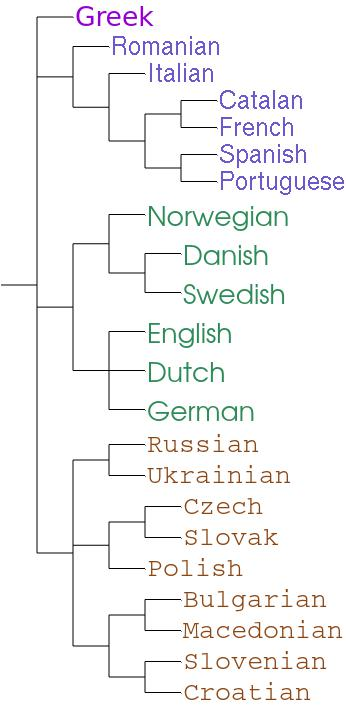

In [3]:
ts = get_tree_layout()
with open("../data/gt_tree.txt") as f:
    pred_tree_string = f.read().strip()

pred_indo_euro_tree = Tree(pred_tree_string)

output_file = '../plots/gt_tree.jpg'
pred_indo_euro_tree.render(output_file, tree_style=ts, dpi=300)
Image(filename=output_file, width=200) 

### Predicted Tree Visualization
Next we will visualize the predicted phylogenetic tree. As you will see the trees are quite similar.

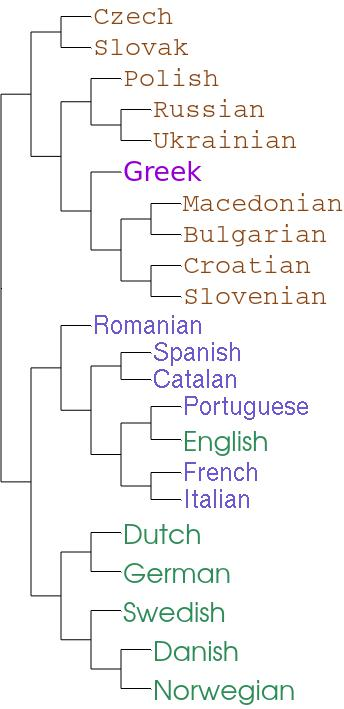

In [4]:
ts = get_tree_layout()
with open("../data/tree.txt") as f:
    pred_tree_string = f.read().strip()

pred_indo_euro_tree = Tree(pred_tree_string)

output_file = '../plots/tree.jpg'
pred_indo_euro_tree.render(output_file, tree_style=ts, dpi=300)
Image(filename=output_file, width=200) 
